In [17]:
#Importing basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#Importing Algorithms
import sklearn.linear_model as linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

#Importing Model Evaluation Metrics
from sklearn.metrics import mean_squared_error

In [18]:
#Importing the dataset
energy_data = pd.read_csv(r"C:\Users\Olusegun\Desktop\hamoyeInternship\LinearRegression\energydata_complete_quiz.csv")
#Display and preview the imported dataset(dataframe)
energy_data.head(3)

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668


# Data Preprocessing
A. Data Wrangling or Cleaning

In [19]:
#checking the dimension of the dataset
display(f"This dataset has {energy_data.shape[0]} rows and  {energy_data.shape[1]} columns")

'This dataset has 19735 rows and  29 columns'

In [20]:
#checking the information such as datatypes, missing columns that are dataset contains
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
date           19735 non-null object
Appliances     19735 non-null int64
lights         19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 n

Observations
1. The dataset has no missing values each feature has 19735 rows/observations.
2. The dataset has 29 variables of which 26 are float64 datatypes, 2 are int64 datatypes, and 1 is  object datatype

# Exploratory Data Analysis
Univariate Data Analysis of Numerical Features in the Dataset

In [21]:
#Extract only the numeric variables from the dataframe
energy_data.select_dtypes("number").head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [22]:
# Describing the statistics of the numeric features in the dataset.
energy_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


C:\Users\Olusegun\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


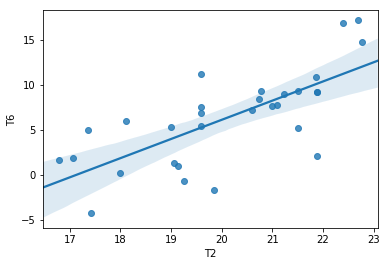

In [23]:
#Question 17
simple_linear_reg = energy_data[['T2', 'T6']].sample(30, random_state=2)
sns.regplot(x="T2", y="T6", data=simple_linear_reg)

In [24]:
#Question18
# drop 'date' and lights' colums
energy_data = energy_data.drop(columns=['date','lights'], axis = 1)

In [25]:
#Question18 Confirm the data and light columns have been dropped
energy_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 27 columns):
Appliances     19735 non-null int64
T1             19735 non-null float64
RH_1           19735 non-null float64
T2             19735 non-null float64
RH_2           19735 non-null float64
T3             19735 non-null float64
RH_3           19735 non-null float64
T4             19735 non-null float64
RH_4           19735 non-null float64
T5             19735 non-null float64
RH_5           19735 non-null float64
T6             19735 non-null float64
RH_6           19735 non-null float64
T7             19735 non-null float64
RH_7           19735 non-null float64
T8             19735 non-null float64
RH_8           19735 non-null float64
T9             19735 non-null float64
RH_9           19735 non-null float64
T_out          19735 non-null float64
Press_mm_hg    19735 non-null float64
RH_out         19735 non-null float64
Windspeed      19735 non-null float64
Visibility     1973

In [28]:
#Question18 #Extracting the columns of the dataset
energy_data.columns

Index(['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2'],
      dtype='object')

In [30]:
#Question18
#Dividng data into x_train and y_train
target = "Appliances"
features = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4',
       'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9',
       'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility',
       'Tdewpoint', 'rv1', 'rv2']
X_train = energy_data[features]  #feature matrix X
y_train = energy_data[target]   #Target vector y

In [31]:
#Question18
# Split dataset by 70% (X_train, y_train) to train dataset and 30% (X_test, y_test) to validate dataset
from sklearn. model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.25, random_state= 42)

In [32]:
#Question18
#Normalize the dataset using the MinMaxScaler
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
X_train_minmax = min_max_scaler.fit_transform(X_train)

min_max_scaler = preprocessing.MinMaxScaler()
X_test_minmax = min_max_scaler.fit_transform(X_test) 

In [40]:
#Question18 #Modelling
from sklearn.linear_model import LinearRegression
linear_model   =   LinearRegression()    
linear_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [78]:
#Question 18 #Prediction
y_pred_test = linear_model.predict(X_test)
y_pred_train = linear_model.predict(X_train)

#MAE evaluation for training set
from    sklearn.metrics    import    mean_absolute_error  
mae   =   mean_absolute_error(y_train,   y_pred_train).round(3) 
mae

53.941

In [52]:
#Question 19
#RMSE evaluationfor training set
from sklearn.metrics import mean_squared_error 
rmse = np.sqrt(mean_squared_error(y_train,  y_pred_train)).round(3)
rmse 

95.494

In [53]:
#Question 20
#MAE evaluation for test set
from    sklearn.metrics    import    mean_absolute_error  
mae_test = mean_absolute_error(y_test,   y_pred_test).round(3) 
mae_test

53.511

In [54]:
#Question 21
#RMSE evaluationfor test set
from sklearn.metrics import mean_squared_error 
rmse_test = np.sqrt(mean_squared_error(y_test,  y_pred_test)).round(3)
rmse_test 


92.492

In [57]:
#Question 22
#Train a ridge regression model with default parameters
ridge_reg   =   Ridge(alpha= 1.0)  
ridge_reg.fit(X_train, y_train) 

#
y_pred_test_2 = ridge_reg.predict(X_test)

#RMSE evaluationfor test set
from sklearn.metrics import mean_squared_error 
rmse_test = np.sqrt(mean_squared_error(y_test,  y_pred_test_2)).round(3)
rmse_test 

92.492

In [59]:
#Question 23
#Train a lasso regression model with default value 
lasso_reg = Lasso(alpha = 1.0) 
lasso_reg.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [77]:
#Question 24
#comparing   the   effects   of   regularisation  
def get_weights_energy_data(model, feat, col_name):
    #this   function   returns   the   weight   of   every   feature  
    weights = pd.Series(model.coef_, feat.columns).sort_values()     
    weights_energy_data   =   pd.DataFrame(weights).reset_index()    
    weights_energy_data.columns   =   [ 'Features' , col_name]    
    weights_energy_data[col_name].round(3)      
    return  weights_energy_data 

linear_model_weights =  get_weights_energy_data(linear_model, X_train,  'Linear_Model_Weight')  
ridge_weights_energy_data = get_weights_energy_data(ridge_reg, X_train,   'Ridge_Weight')  
lasso_weights_energy_data = get_weights_energy_data(lasso_reg,   X_train, 'Lasso_weight')  

final_weights   =   pd.merge(linear_model_weights,   ridge_weights_energy_data,   on= 'Features' )  
final_weights   =   pd.merge(final_weights,   lasso_weights_energy_data,   on= 'Features' )  
final_weights

,Features,Linear_Model_Weight,Ridge_Weight,Lasso_weight
0,T9,-20.859891,-20.850245,-16.220184
1,T2,-19.555037,-19.544062,-11.336641
2,RH_2,-14.655294,-14.650309,-10.831270
3,T_out,-10.544509,-10.537311,-3.676446
4,RH_8,-5.689593,-5.689397,-5.395446
5,RH_7,-1.890038,-1.889937,-1.838606
6,RH_9,-1.824452,-1.824782,-1.563641
7,T5,-1.674326,-1.677019,-1.437811
8,RH_out,-0.939363,-0.938364,-0.000000
9,rv1,0.010097,0.010093,0.010273


In [76]:
#Question 25
#What is the new RMSE with the Lasso Regression on the test set?
y_pred_test_3 = lasso_reg.predict(X_test)

rmse_test_lasso = np.sqrt(mean_squared_error(y_test,  y_pred_test_3)).round(3)
rmse_test_lasso

92.684